# Novartis Data Science Hiring Challenge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing Datasets and Data cleaning

### Train set cleaning

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [4]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [6]:
train['X_12'].fillna((train['X_12'].mean()), inplace=True)

In [7]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [8]:
train['WEEKDAY'] = pd.to_datetime(train['DATE']).dt.dayofweek
train['IsWeekend'] = 0
train.loc[train['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

In [9]:
train.drop('DATE', axis=1, inplace=True)

In [10]:
train['INCIDENT_ID'] =train.INCIDENT_ID.str.slice(3, 9)

In [11]:
train['INCIDENT_ID'].head()

0    102659
1    189752
2    184637
3    139071
4    109335
Name: INCIDENT_ID, dtype: object

In [12]:
train.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY,IsWeekend
0,102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6,1
1,189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1,0
2,184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2,0
3,139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,4,0
4,109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23856 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  int64 

### Test set modification

In [14]:
test = pd.read_csv("Test.csv")
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [15]:
test['X_12'].fillna((test['X_12'].mean()), inplace=True)

In [16]:
test['WEEKDAY'] = pd.to_datetime(test['DATE']).dt.dayofweek
test['IsWeekend'] = 0
test.loc[train['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

In [17]:
test.drop('DATE', axis=1, inplace=True)

In [18]:
test['INCIDENT_ID'] =test.INCIDENT_ID.str.slice(3, 9)

In [19]:
test.isnull().sum()

INCIDENT_ID    0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
WEEKDAY        0
IsWeekend      0
dtype: int64

## Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

##### We can see that X_1, X_8, X_10, X_12 are skewed to the left which indicates most of the values lie in the lower range values, and X_13 shows some sort of normal distribution skewed to the right.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007AD301CA08>,
      dtype=object)

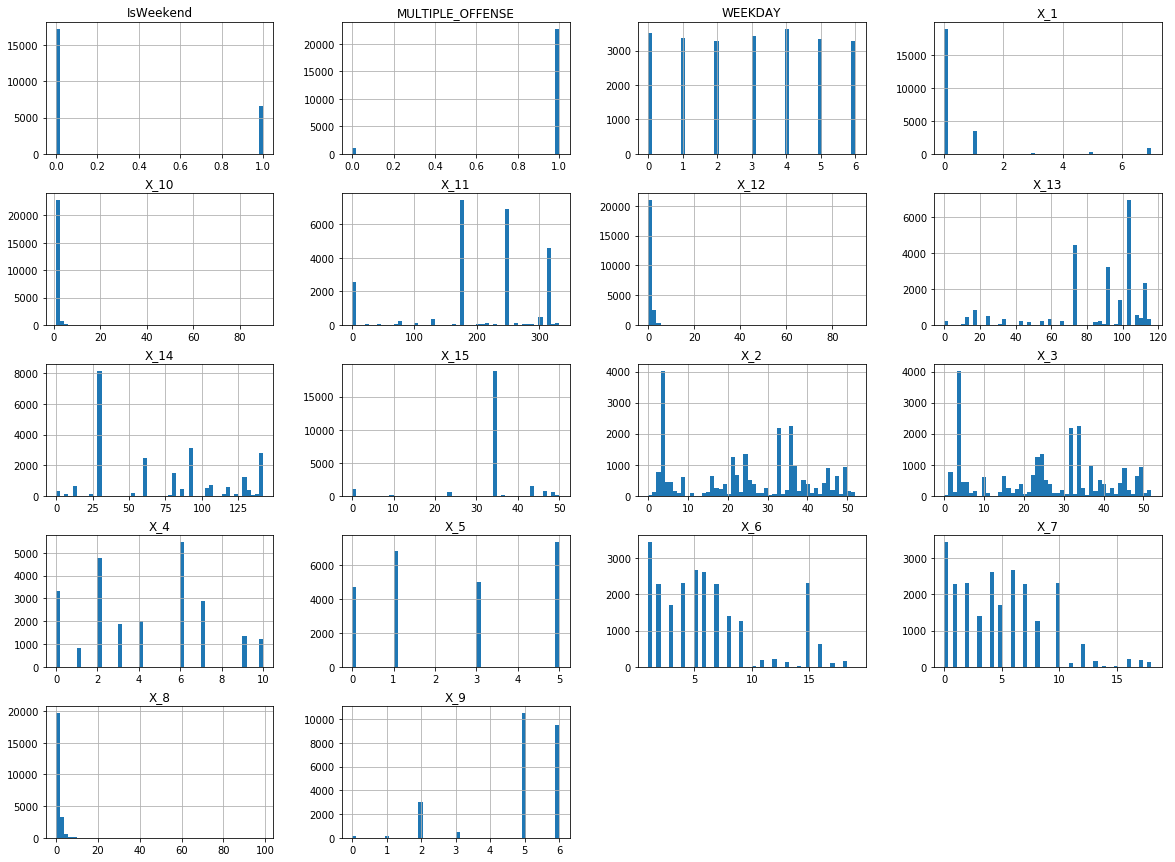

In [21]:
train.hist(bins = 50, figsize = (20, 15))

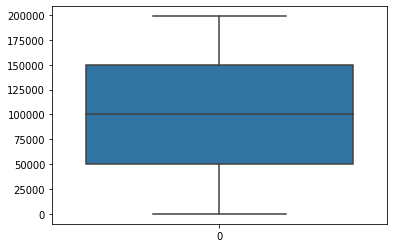

In [22]:
sns.boxplot(data=train["INCIDENT_ID"])

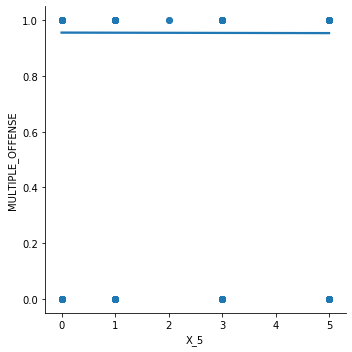

In [23]:
plot = sns.lmplot(x='X_5', y='MULTIPLE_OFFENSE', data=train)

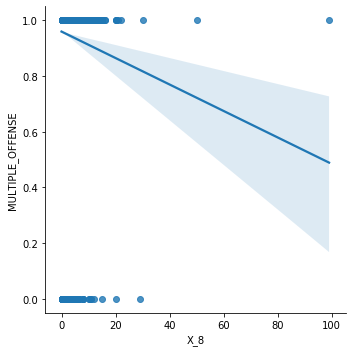

In [24]:
plot = sns.lmplot(x='X_8', y='MULTIPLE_OFFENSE', data=train)

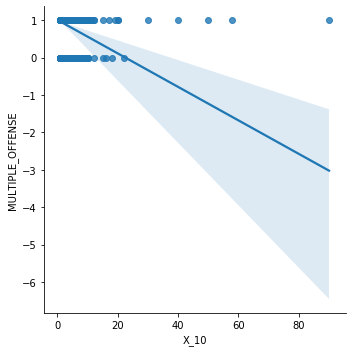

In [25]:
plot = sns.lmplot(x='X_10', y='MULTIPLE_OFFENSE', data=train)

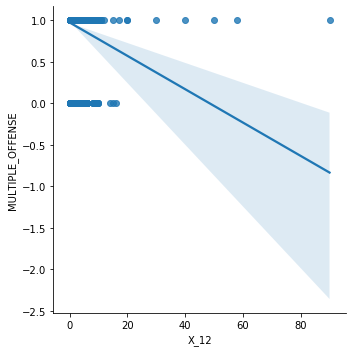

In [26]:
plot = sns.lmplot(x='X_12', y='MULTIPLE_OFFENSE', data=train)

##### Representation of the categorical data(INCIDENT_ID) using rectangular bars with value counts of the categorical values in the form of frequency over the different weekdays.

Text(0, 0.5, 'Frequency')

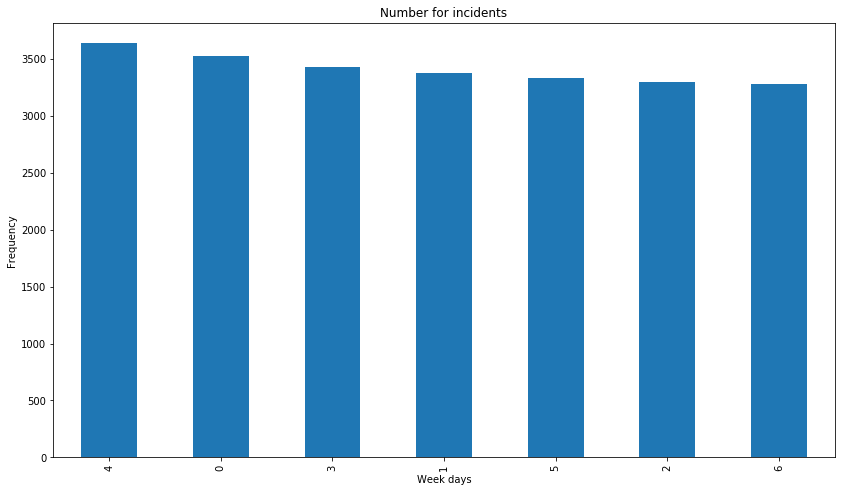

In [27]:
graph = train['WEEKDAY'].value_counts().plot(kind='bar', figsize=(14,8), title="Number for incidents")
graph.set_xlabel("Week days")
graph.set_ylabel("Frequency")

###### A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model. In this correalation matrix we can see that many variables are correlated with each other like X_2 and X_3(highly correlated), X_6 and X_7, X_10 and X_12 and some other variables as well.

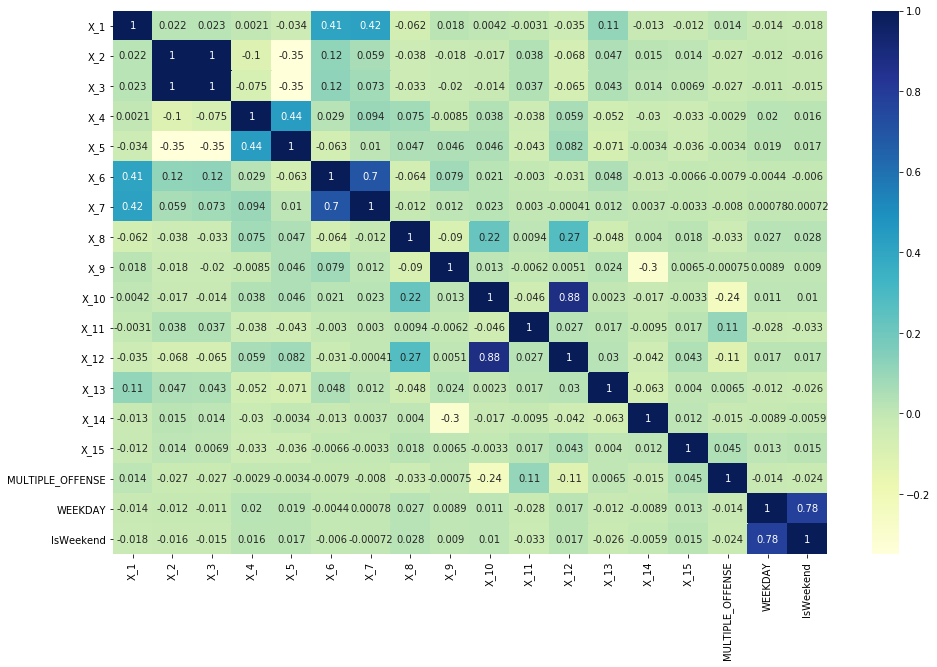

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model Building

### Train-Test splitting

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
y_train = df_train.pop('MULTIPLE_OFFENSE')
X_train = df_train


X_test= df_test.drop('MULTIPLE_OFFENSE', axis=1)
y_test= df_test['MULTIPLE_OFFENSE']

### Importing Libraries for different models

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import math
from geopy.distance import vincenty
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### Decision Tree Regressor

In [32]:
# Define model
dtr_model = DecisionTreeRegressor()

# Fit model
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
print(X_train.head())
print("The predictions are")
print(dtr_model.predict(X_train.head()))

      INCIDENT_ID  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  \
4591        61461    0   33   32    2    1    6    4    0    5     1   174   
17773      109300    0   33   32    2    1    5    6    0    5     1   174   
10239      193279    0    7    8    7    3    2    7    1    2     1   249   
12148       58475    0    4    4    6    5    2    7    0    5     1   174   
19923       39791    0   40   40    2    1    5    6    2    6     1   174   

       X_12  X_13  X_14  X_15  WEEKDAY  IsWeekend  
4591    0.0    98    62    43        4          0  
17773   0.0    92    93    43        6          1  
10239   1.0    67   140    34        2          0  
12148   1.0    72    93    34        3          0  
19923   1.0    72    93    34        0          0  
The predictions are
[1. 1. 1. 1. 1.]


In [34]:
# Show model results of training set
y_hat = dtr_model.predict(X_train)
mae = metrics.mean_absolute_error(y_train,y_hat)
mse = metrics.mean_squared_error(y_train,y_hat)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr_model.score(X_train,y_train))
print ("feature_importances:",dtr_model.feature_importances_)
print ("n_features:         ",dtr_model.n_features_)
print ("n_outputs:          ",dtr_model.n_outputs_)

TRAINING SET
MAE:                 0.0
RMSE:                0.0
r2:                  1.0
feature_importances: [4.81591005e-03 0.00000000e+00 6.93611415e-04 0.00000000e+00
 0.00000000e+00 6.93611415e-04 2.36643894e-04 2.33310527e-03
 0.00000000e+00 6.93611415e-04 2.02006402e-01 3.92294024e-01
 2.64303603e-01 0.00000000e+00 0.00000000e+00 1.31929478e-01
 0.00000000e+00 0.00000000e+00]
n_features:          18
n_outputs:           1


In [35]:
### running the alogrithms on test data.
y_hat = dtr_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", dtr_model.score(X_test,y_test))

TEST SET
MAE:                 0.0022355735643426015
RMSE:                0.04728185237850355
r2:                  0.9465439749936047


#### Random Forest Classifier

In [36]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = rfc_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       313
           1       0.99      1.00      1.00      6844

    accuracy                           0.99      7157
   macro avg       0.98      0.93      0.95      7157
weighted avg       0.99      0.99      0.99      7157



#### Grid Search

In [38]:
# Create a based model
rf = RandomForestClassifier()

# Create the parameter grid based on the results of random search 
param_grid = { 
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [39]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
print('We can get an accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get an accuracy of 0.9744895655087064 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


#### Random Forest Classifier

In [41]:
rfc_model = RandomForestClassifier(bootstrap=True, max_depth=4, min_samples_leaf=100, min_samples_split=200, max_features=10, n_estimators=300)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predictions = rfc_model.predict(X_test)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62       313
           1       0.98      1.00      0.99      6844

    accuracy                           0.98      7157
   macro avg       0.96      0.73      0.80      7157
weighted avg       0.97      0.98      0.97      7157



##### Datatype Conversion of incident ID

In [44]:
import warnings
warnings.filterwarnings('ignore')

X_train['INCIDENT_ID'] = X_train['INCIDENT_ID'].astype(int)
X_test['INCIDENT_ID'] = X_test['INCIDENT_ID'].astype(int)

#### XGB Model

In [45]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred = xgb_model.predict(X_test)

In [47]:
predictions = [round(value) for value in y_pred]

In [48]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.89%


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       313
           1       1.00      1.00      1.00      6844

    accuracy                           1.00      7157
   macro avg       0.99      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



## Creation of submission file 

In [50]:
test['INCIDENT_ID'] = test['INCIDENT_ID'].astype(int)

In [51]:
rfc_model_testcopy = test.copy()

In [52]:
rfc_model_testcopy['MULTIPLE_OFFENSE'] = xgb_model.predict(rfc_model_testcopy)

In [53]:
rfc_model_testcopy['INCIDENT_ID'] = 'CR_' + rfc_model_testcopy['INCIDENT_ID'].astype(str)
rfc_model_testcopy.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,WEEKDAY,IsWeekend,MULTIPLE_OFFENSE
0,CR_195453,0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23,3,1,1
1,CR_103520,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,4,0,1
2,CR_196089,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,5,0,1
3,CR_112195,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,4,0,1
4,CR_149832,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,0,0,1


In [54]:
rfc_model_df_results = rfc_model_testcopy[['INCIDENT_ID','MULTIPLE_OFFENSE']]

In [55]:
rfc_model_df_results.to_csv('submission_file.csv',index=False)